In [20]:
import sys
import os

sys.path.append(os.path.abspath(".."))


Nyckeltal Test

      category     revenue
2  Electronics  1364228.07
4       Sports   734653.42
1     Clothing   586744.91


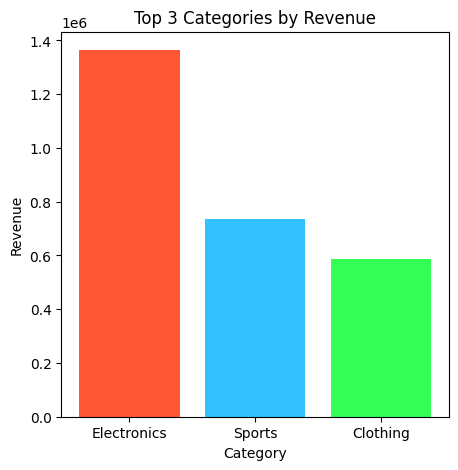

In [1]:
from src import metrics, viz,io_utils

sales_data_df = io_utils.load_data("data/ecommerce_sales.csv")

print(metrics.top_3_category_by_revenue(sales_data_df))

viz.top_3_category_by_revenue_graph(sales_data_df)

## Datakontroll och Städning (Salam)
Rensar kolumnnamn, tar bort tomma värden och säkerställer att intäkterna är numeriska.

In [14]:
import pandas as pd
sales_data_df.columns = sales_data_df.columns.str.strip().str.lower()
sales_data_df['category'] = sales_data_df['category'].str.strip()
sales_data_df = sales_data_df.dropna(subset=['category', 'revenue'])
sales_data_df['revenue'] = pd.to_numeric(sales_data_df['revenue'], errors='coerce')

sales_data_df.head()


,order_id,date,city,category,price,units,revenue
0,100000,2024-04-19,Stockholm,Sports,530.95,4,2123.80
1,100001,2024-05-06,Malmö,Sports,653.28,3,1959.84
2,100002,2024-03-07,Uppsala,Clothing,177.98,4,711.92
3,100003,2024-04-08,Göteborg,Home,348.57,3,1045.71
4,100004,2024-01-18,Uppsala,Electronics,777.07,3,2331.21


## Analys av intäkter per kategori (Salam)


In [15]:
from src.metrics import revenue_per_category
revenue_per_category(sales_data_df)


,category,revenue
2,Electronics,1364228.07
4,Sports,734653.42
1,Clothing,586744.91
3,Home,511070.87
0,Beauty,163053.97
5,Toys,143015.99


## Visualisering


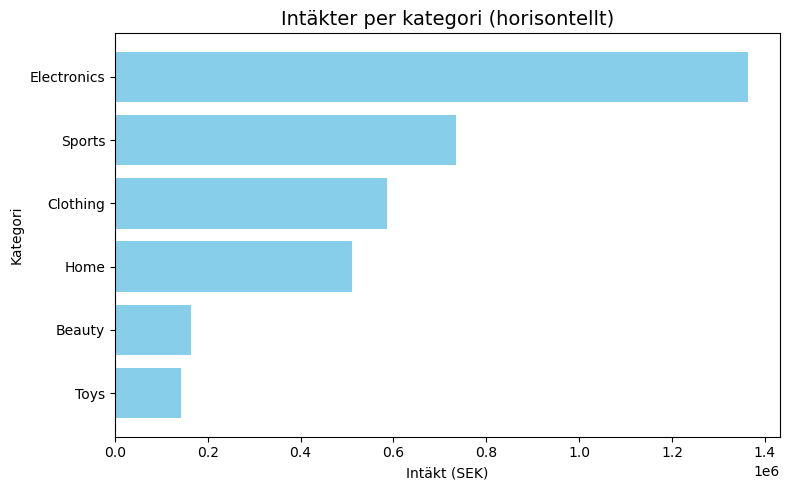

In [17]:
import matplotlib.pyplot as plt

sorted_df = sales_data_df.groupby('category')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=True)

plt.figure(figsize=(8,5))
plt.barh(sorted_df['category'], sorted_df['revenue'], color='skyblue')
plt.title("Intäkter per kategori (horisontellt)", fontsize=14)
plt.xlabel("Intäkt (SEK)")
plt.ylabel("Kategori")
plt.tight_layout()
plt.show()
